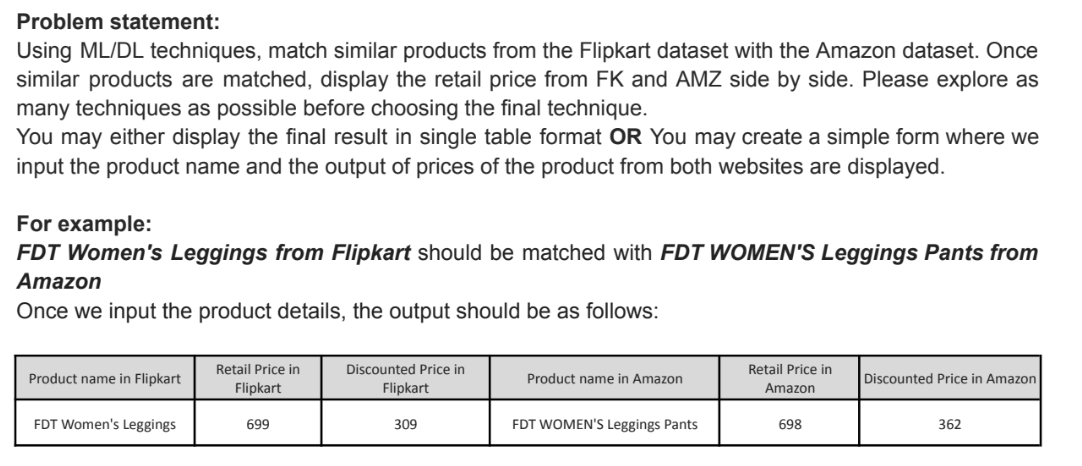

<h3>IMPORT PACKAGES</h3>

In [4]:
!python -m spacy download en_core_web_lg

     ------------------------------------ 777.1/777.1 MB 573.6 kB/s eta 0:00:00

2022-12-07 00:26:33.874490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-07 00:26:33.874526: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
!pip install tensorflow_hub
!pip install tensorflow_text


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from difflib import SequenceMatcher
import spacy
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<h3>LOADING DATASET</h3>

In [3]:
df_a=pd.read_excel('amazon_dataset.xlsx')
df_f=pd.read_excel('flipkart_dataset.xlsx')

In [5]:
df_a.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
df_f.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


<h3>Similarity between texts</h3>
    
We are going to look for products which match with the search item we have entered. Then the items which are most similar to our search will be printed.

SEQUENCE MATCHER

In [7]:
import numpy as np

In [30]:
def sequence_matching(dfa,dff,search):
#     max_a=SequenceMatcher(None,search,dfa['product_name'][0]).ratio()
#     max_f=SequenceMatcher(None,search,dff['product_name'][0]).ratio()
    a=[]
    f=[]
    for i in range(1,dfa.shape[0]):  #iterate through the data in amazon dataset
        ratio_a=SequenceMatcher(None,search.lower(),dfa['product_name'][i].lower()).ratio()
        if ratio_a>.5:   #we have set the ratio threshold to be .50
            a.append([dfa['product_name'][i],dfa['retail_price'][i],dfa['discounted_price'][i],ratio_a])
            #if threshold is satisfied, then the data is appended to a list
     
    for i in range(dff.shape[0]):     #iterate through the data in flipkart dataset
        ratio_f=SequenceMatcher(None,search.lower(),dff['product_name'][i].lower()).ratio()
        if ratio_f>0.5:
            f.append([dff['product_name'][i],dff['retail_price'][i],dff['discounted_price'][i],ratio_f])
    
    a=sorted(a, key=lambda x: x[3], reverse=True)  #sorting the above list in descending order
    f=sorted(f, key=lambda x: x[3], reverse=True)
    
    pd_a=pd.DataFrame(a)   #converting the list into a pandas dataframe
    pd_a.columns=['Product Name in Amazon','Retail Price','Discounted Price','Ratio']
    pd_f=pd.DataFrame(f)
    pd_f.columns=['Product Name in Flipkart','Retail Price','Discounted Price','Ratio']
    
#     final_pd=pd.concat([pd_a.iloc[:,0:3],pd_f.iloc[:,0:3]],axis=1)
    
    return pd_a,pd_f

SequenceMatcher gives a ratio of how similar one text is to another. We can use this 

SPACY WORD EMBEDDING

In [10]:
nlp=spacy.load("en_core_web_lg")

In [36]:
def word_embedding_matching(dfa,dff,search):
#     max_a=SequenceMatcher(None,search,dfa['product_name'][0]).ratio()
#     max_f=SequenceMatcher(None,search,dff['product_name'][0]).ratio()
    a=[]
    f=[]
    doc=nlp(search)
    for i in range(1,dfa.shape[0]):   #iterating through the amazon dataframe
        doc_a=nlp(dfa['Product Name in Amazon'][i].lower())   #converting string into nlp instance
        ratio_a=doc.similarity(doc_a)  #word embedding similarity between strings
        if ratio_a>.7:
            a.append([dfa['Product Name in Amazon'][i],dfa['Retail Price'][i],dfa['Discounted Price'][i],ratio_a])
     
    for i in range(dff.shape[0]):   #iterating through the amazon dataframe
        doc_f=nlp(dff['Product Name in Flipkart'][i].lower())
        ratio_f=doc.similarity(doc_f)     #word embedding similarity between strings
        if ratio_f>0.7:
            f.append([dff['Product Name in Flipkart'][i],dff['Retail Price'][i],dff['Discounted Price'][i],ratio_f])
    
    a=sorted(a, key=lambda x: x[3], reverse=True)
    f=sorted(f, key=lambda x: x[3], reverse=True)
    
    pd_a=pd.DataFrame(a)
    pd_a.columns=['Product Name in Amazon','Retail Price','Discounted Price','Ratio']
    pd_f=pd.DataFrame(f)
    pd_f.columns=['Product Name in Flipkart','Retail Price','Discounted Price','Ratio']
    
    final_pd=pd.concat([pd_a.iloc[:,0:3],pd_f.iloc[:,0:3]],axis=1)   #concatenation both the dataframes
    
    return final_pd.head()

BERT Word Embeddings

In [13]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")  #instantiating bert preprocessor
    
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4") #instantiation bert encoder

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
def get_bert_embedding_ratio(sentences):
    preprocessed_text=bert_preprocess(sentences)   #pre-processing the text list
    output=bert_encoder(preprocessed_text)["pooled_output"]   #bert embedding of the text list passed
    return cosine_similarity([output[0],output[1]])   #returns cosine similarity between both embeddings

In [27]:
def bert_embedding_matching(dfa,dff,search):
#     max_a=SequenceMatcher(None,search,dfa['product_name'][0]).ratio()
#     max_f=SequenceMatcher(None,search,dff['product_name'][0]).ratio()
    a=[]
    f=[]
    doc=nlp(search)
    for i in range(1,dfa.shape[0]):   #iterating through the amazon dataset
#         doc_a=nlp(dfa['product_name'][i].lower())
        ratio_a=get_bert_embedding_ratio([search,dfa['product_name'][i]])   #getting bert cosine similarity between strings
        if ratio_a[0][0]>.8:
            a.append([dfa['product_name'][i],dfa['retail_price'][i],dfa['discounted_price'][i],ratio_a])
     
    for i in range(dff.shape[0]):
#         doc_f=nlp(dff['product_name'][i].lower())
        ratio_f=[search,dff['product_name'][i]]   #getting bert cosine similarity between strings
        if ratio_f[0][0]>0.8:
            f.append([dff['product_name'][i],dff['retail_price'][i],dff['discounted_price'][i],ratio_f])
    
    a=sorted(a, key=lambda x: x[3], reverse=True)
    f=sorted(f, key=lambda x: x[3], reverse=True)
    
    pd_a=pd.DataFrame(a)
    pd_a.columns=['Product Name in Amazon','Retail Price','Discounted Price','Ratio']
    pd_f=pd.DataFrame(f)
    pd_f.columns=['Product Name in Flipkart','Retail Price','Discounted Price','Ratio']
    
    final_pd=pd.concat([pd_a.iloc[:,0:3],pd_f.iloc[:,0:3]],axis=1)   #concatenating both the datasets
    
    return final_pd.head()

<h3> FINAL MODEL </h3>

In [42]:
def search_matching(amazon,flipkart,search):
    pd_a,pd_f=sequence_matching(amazon,flipkart,search)   #sequence matching 
    return word_embedding_matching(pd_a,pd_f,search)    #spacy embedding

In [43]:
search_matching(df_a,df_f,"Alisha Solid Womens shorts")   #pass the search term in quotes to get an output

,Product Name in Amazon,Retail Price,Discounted Price,Product Name in Flipkart,Retail Price,Discounted Price
0,Alisha Solid Women's Cycling Shorts,1198.0,602.0,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,Alisha Solid Women's Cycling Shorts,1197.0,542.0,Alisha Solid Women's Cycling Shorts,699.0,267.0
2,Alisha Solid Women's Cycling Shorts,990.0,479.0,Alisha Solid Women's Cycling Shorts,1199.0,479.0
3,Alisha Solid Women's Cycling Shorts,995.0,434.0,Alisha Solid Women's Cycling Shorts,1199.0,479.0
4,ALISHA SOLID WOMEN'S CYCLING ShorTS,-2.0,0.0,Alisha Solid Women's Cycling Shorts,999.0,379.0


We looked through three methods for checking similarity between the strings:

* Sequence Matcher : This method tries to see how similar two strings are based on the sequence of the words and letters. This gives us the ratio of similarity between the two strings. Computationally, it's the fastest among the three methods.

* Spacy similarity : This method uses a language model trained on various words to create an appropriate word embedding. These word embeddings can then be compared to generate a similarity score. This gives better outputs than the sequence matcher, but it is time consuming.

* Bert embedding : This method uses a huge language model trained on millions of articles and books from the internet. This creates a word embedding which can be compared using cosine similarity. This gives the best output among the others. However, it takes too much time to generate embedding for 1000s of words 

<hr>

# Conclusion
Considering the above observations, I have used sequence matcher and Spacy embedding to create a more robust model. Firstly, we check the sequence similarity and create a new dataset with data whose similarity is more than our set threshold. Secondly, we pass this new dataset onto spacy emebedding and then find the similarity between this dataset. Finally, we display the output according to the threshold we have set on spacy embedding. 

This reduces computation as we don't have to look for spacy embedding for all the data.